In [6]:
import os
import numpy as np
import pandas as pd
import numpy.linalg as LA

In [7]:
import matplotlib.pyplot as plt

In [21]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [1]:
from tqdm import tqdm

In [2]:
tqdm.pandas()

In [3]:
pj = os.path.join


set *root* to your root folder where the csv file is
csv file can be downloaded from https://www.federalreserve.gov/data/nominal-yield-curve.htm


In [4]:
root = '/Users/mauriciobarba/repos/crypto-pca'

In [8]:
crypto_files = {i[:-10]: pd.read_csv(pj(root, 'crypto-data', i)) for i in os.listdir(pj(root,'crypto-data')) if i.endswith('.csv')}
equity_files = {i[:-4]: pd.read_csv(pj(root, 'equity-data', i)) for i in os.listdir(pj(root,'equity-data')) if i.endswith('.csv')}


In [9]:
crypto_data = {}
for i in crypto_files:
    crypto_data[i] = crypto_files[i]['Price ($)']

equity_data = {}
for i in equity_files:
    equity_data[i] = equity_files[i]['Close']
crypto_df = pd.DataFrame(crypto_data)
equity_df = pd.DataFrame(equity_data)
crypto_df = crypto_df.pct_change().drop(0, axis=0)
equity_df = equity_df.pct_change().drop(0, axis=0)

print(crypto_df)

          SOL       UNI      LUNA      AVAX       ADA       BTC       DOT  \
1   -0.025510 -0.023256 -0.031250 -0.016432  0.000000  0.013767  0.021127   
2   -0.062827 -0.057823  0.000000 -0.014320  0.000000 -0.006458 -0.004598   
3   -0.061453 -0.021661 -0.032258  0.004843 -0.090909  0.003024  0.083141   
4    0.023810  0.040590  0.033333 -0.004819  0.000000  0.045510 -0.002132   
5   -0.116279 -0.053191  0.000000 -0.014528  0.000000 -0.027256 -0.068376   
..        ...       ...       ...       ...       ...       ...       ...   
360 -0.015514 -0.019646 -0.012962 -0.014215 -0.013889  0.007051 -0.023499   
361 -0.006291  0.023969  0.055882  0.027578 -0.004695  0.040306  0.006806   
362  0.122834  0.000000  0.132575  0.048939  0.033019  0.026657  0.075567   
363  0.076651  0.003070 -0.041822  0.026756 -0.018265 -0.055806 -0.034792   
364  0.046387 -0.015302  0.000000  0.069870  0.009302 -0.024173  0.017907   

          ETH       BNB      DOGE  
1    0.007508 -0.001307       NaN  
2  

Text(0, 0.5, 'Standard Deviation')

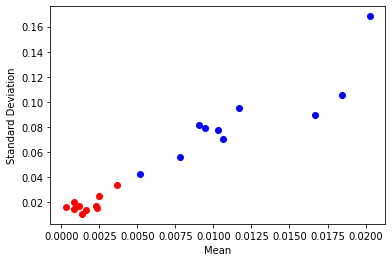

In [16]:
crypto_means = crypto_df.replace(np.inf,np.nan).mean()
crypto_sd = crypto_df.replace(np.inf,np.nan).std()
equity_means = equity_df.replace(np.inf,np.nan).mean()
equity_sd = equity_df.replace(np.inf,np.nan).std()

plt.plot(equity_means,equity_sd,'ro')
plt.plot(crypto_means,crypto_sd,'bo')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')

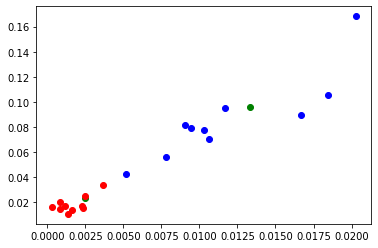

In [56]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(list(zip(crypto_means,crypto_sd))+list(zip(equity_means,equity_sd)))
plt.plot(*zip(np.transpose(kmeans.cluster_centers_)),"go")
plt.plot(equity_means,equity_sd,'ro')
plt.plot(crypto_means,crypto_sd,'bo')

K-means clustering doesn't work well on this dataset because the standard deviation of the crypto points is much higher than that of the equity points.

Let's look at applying some of these algorithms to some fundamentals.